# Imports and settings for nicer plotting

In [1]:
from __future__ import print_function, division, unicode_literals
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('bmh')
plt.rcParams['figure.figsize'] = [9.0, 6.0]
plt.rcParams['lines.markersize'] = 4.5
plt.rcParams['font.size'] = 14
import numpy as np

# Print package versions
import sys
print('Python version:\t\t', sys.version.replace('\n', '\t'))
print('Matplotlib version:\t', mpl.__version__)
print('Numpy version:\t\t', np.__version__)

Python version:		 2.7.11 |Continuum Analytics, Inc.| (default, Dec  6 2015, 18:57:58) 	[GCC 4.2.1 (Apple Inc. build 5577)]
Matplotlib version:	 1.5.0
Numpy version:		 1.10.2


In [2]:
def loosenAxes(ax, loosenFactor):
    """
    Loosen the margins of axes given to the function.
    The range spanned in the x and y directions are
    calculated, and the margin as set a `min([xSpan, ySpan])*loosenFactor`.
    """
    axData = ax.get_lines()[0].get_xydata()
    axMax  = np.abs(axData.max(axis=0))
    axMin  = np.abs(axData.min(axis=0))
    axSpan = np.abs(axMax - axMin)
    ax.margins(np.min(axSpan*loosenFactor))

# Make data and plot it the manual way

In [3]:
x = np.linspace(0.0, 2.0, 20)
y = x**3 - x**2 - x

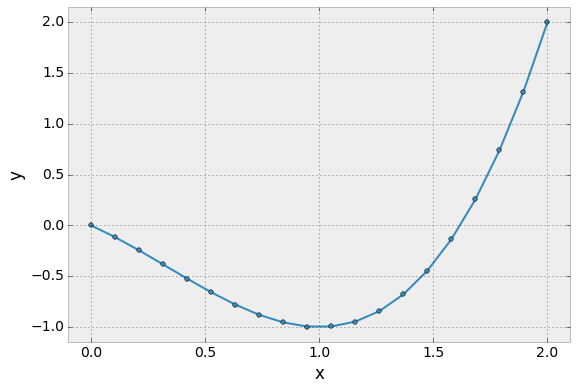

In [4]:
fig, ax = plt.subplots()
ax.autoscale(tight=False)
ax.plot(x, y, 'o-')
ax.set_xlabel('x')
ax.set_ylabel('y')
loosenAxes(ax, 0.05)
plt.show()

# Concatenate data into one array

Since `x` and `y` are one-dimmensional arrays, and extra dimmension is added in order to enable the concatenation.<br>
This is done using the shorthand notation `var[None, :]`, which prepends a singleton dimmension.<br>
Reversing the arguments (`var[:, None]`) would append the singleton dimmension.

In [5]:
data = np.concatenate((x[None, :], y[None, :]), axis=0)
print('data.shape = ', data.shape)
print('data = \n', data)

data.shape =  (2, 20)
data = 
 [[ 0.          0.10526316  0.21052632  0.31578947  0.42105263  0.52631579
   0.63157895  0.73684211  0.84210526  0.94736842  1.05263158  1.15789474
   1.26315789  1.36842105  1.47368421  1.57894737  1.68421053  1.78947368
   1.89473684  2.        ]
 [ 0.         -0.11517714 -0.24551684 -0.38402099 -0.5236915  -0.65753025
  -0.77853915 -0.87972008 -0.95407494 -0.99460563 -0.99431404 -0.94620207
  -0.84327161 -0.67852457 -0.44496282 -0.13558828  0.25659717  0.73859163
   1.31739321  2.        ]]


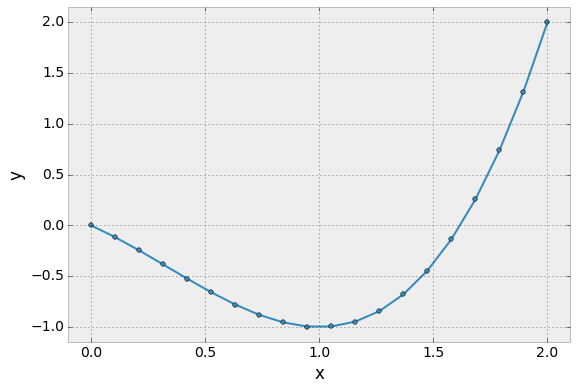

In [6]:
fig, ax = plt.subplots()
plotSetting = dict(linestyle='-', marker='o')
ax.plot(*data, **plotSetting)  # Notice the argument expansions * and **. *-expansion must be issued before **-expansion
ax.set_xlabel('x')
ax.set_ylabel('y')
loosenAxes(ax, 0.05)
plt.show()